In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
main_df_train = pd.read_csv("Data/RussianCurve.csv")

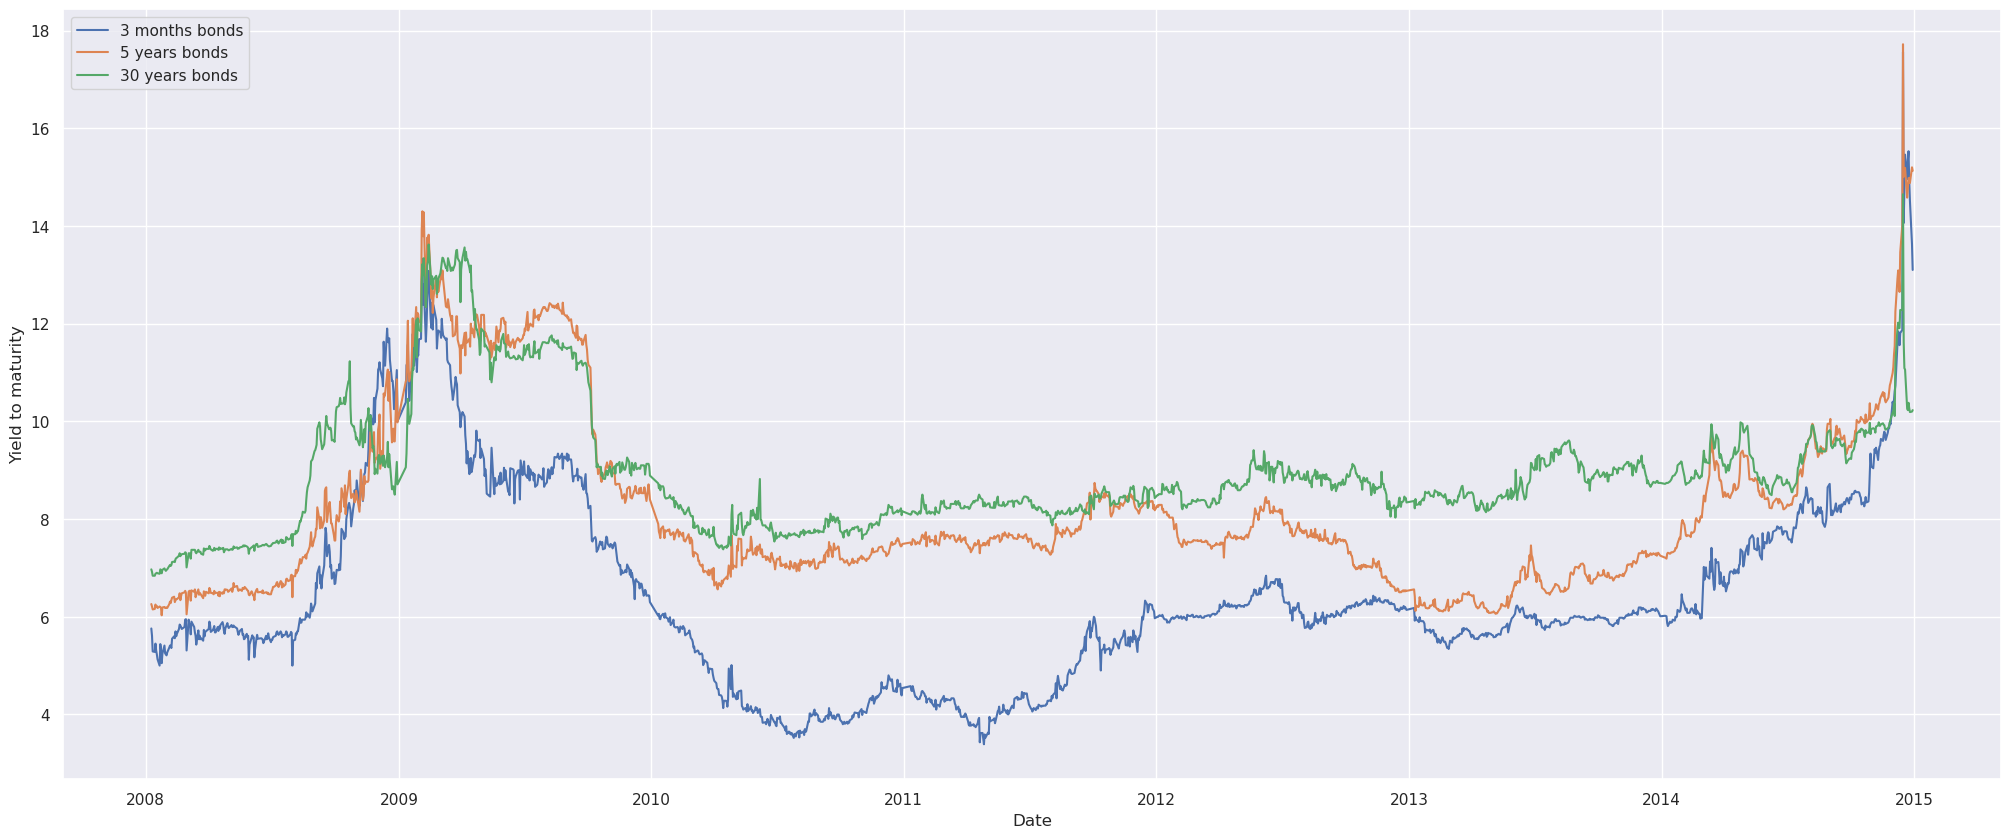

In [8]:
sns.set(rc={"figure.figsize":(25, 10)})

plt.plot(pd.to_datetime(main_df_train["date"]), main_df_train["0.5"], label="3 months bonds")
plt.plot(pd.to_datetime(main_df_train["date"]), main_df_train["5.0"], label="5 years bonds")
plt.plot(pd.to_datetime(main_df_train["date"]), main_df_train["30.0"], label="30 years bonds")
plt.legend()
plt.ylabel("Yield to maturity")

plt.xlabel("Date")
plt.savefig("YTMp.pdf")

In [9]:
def plotZCY(beta0, beta1, beta2, tau):
    def Pr(time):
        return (beta0 + (beta1 + beta2) * (tau / time) * (1 - np.exp(- time / tau)) - beta2 * np.exp(- time / tau))/100
    
    return Pr

In [23]:
coefs = pd.read_csv("Data/coefs.csv")

In [24]:
coefs.head(-5)

,Unnamed: 0,beta0,beta1,beta2,tau
0,0,670.812416,-105.629480,0.000338,2.222611
1,1,665.575848,-165.005828,0.000207,1.375205
2,2,704.732311,-122.959653,-0.000255,2.391770
3,3,759.394361,-196.817660,-0.008632,3.949547
4,4,741.993160,-173.800910,0.009595,2.897311
...,...,...,...,...,...
74,74,-138081.599465,138761.738115,147973.521019,103.705186
75,75,912.496535,-295.216681,-0.010876,0.932828
76,76,979.240050,-318.045297,171.194031,1.410525
77,77,858.398376,-267.925774,-0.007330,0.226913


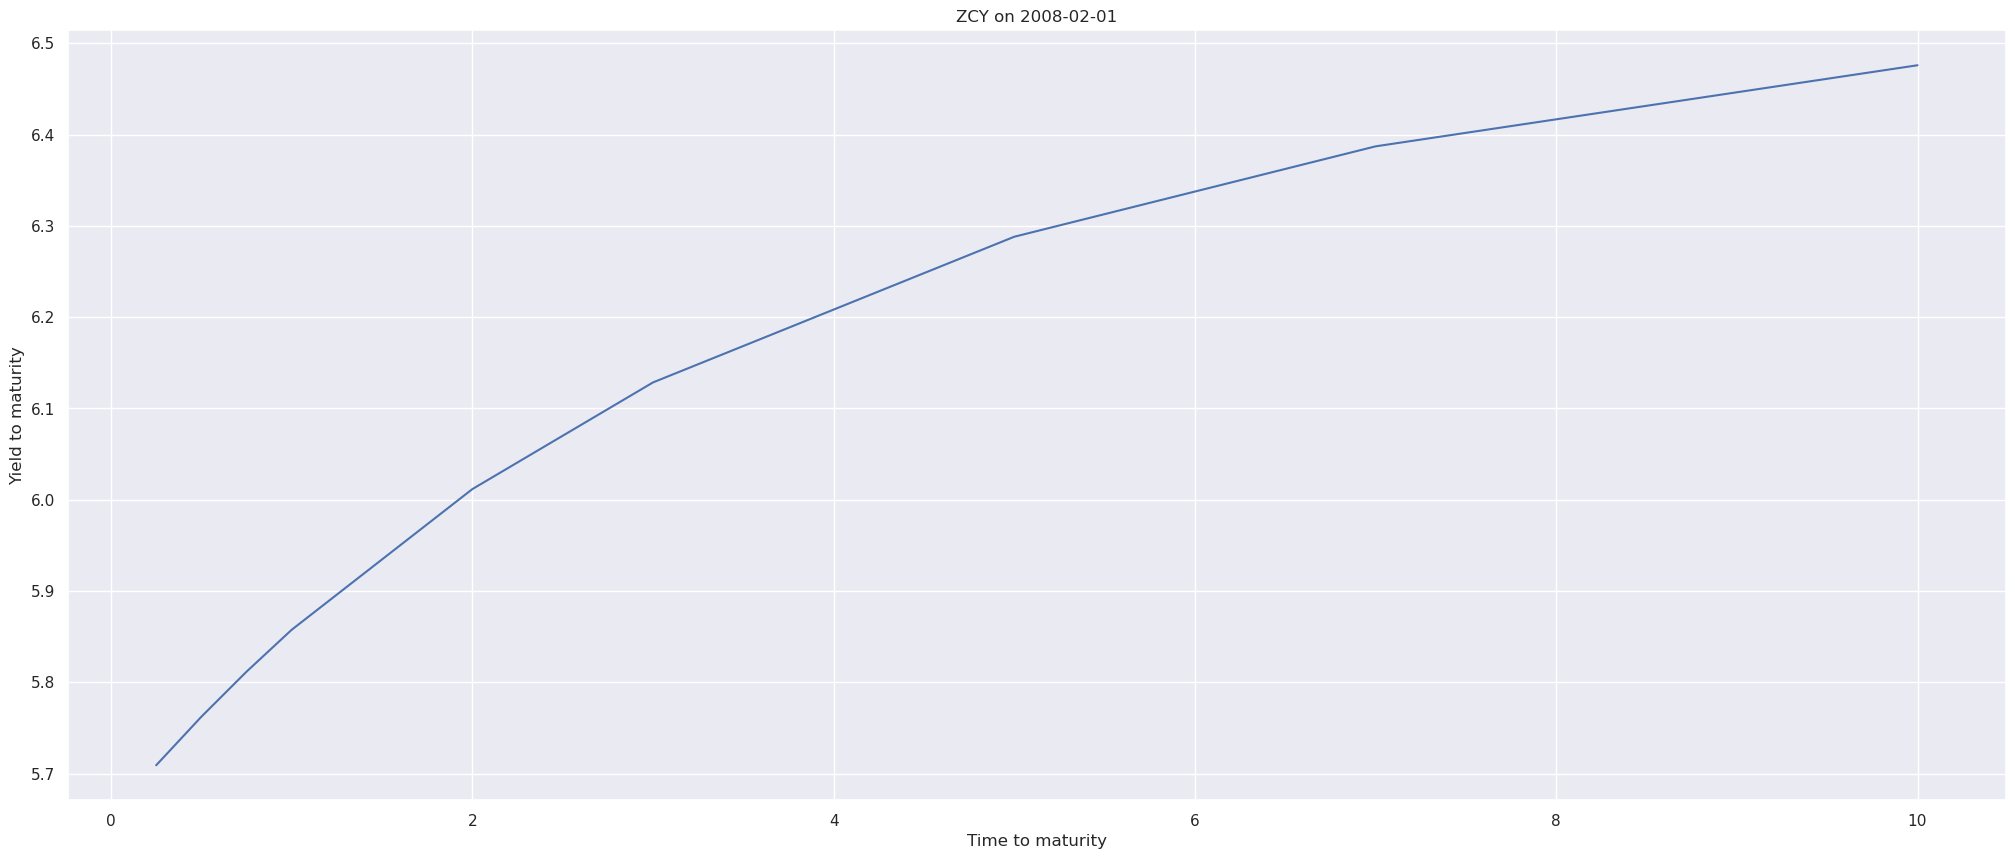

In [15]:
sns.set(rc={"figure.figsize":(25, 10)})

times = np.array([0.25, 0.5, 0.75, 1.0, 2.0, 3.0, 5.0, 7.0, 10.0])

p1=plotZCY(670.812416, -105.629480, 0.000338, 2.222611)
plt.plot(times, p1(times), label="ZCY in 2008-02-01")
plt.ylabel("Yield to maturity")
plt.xlabel("Time to maturity")
plt.title("ZCY on 2008-02-01")
plt.savefig("ZCY1p.pdf")

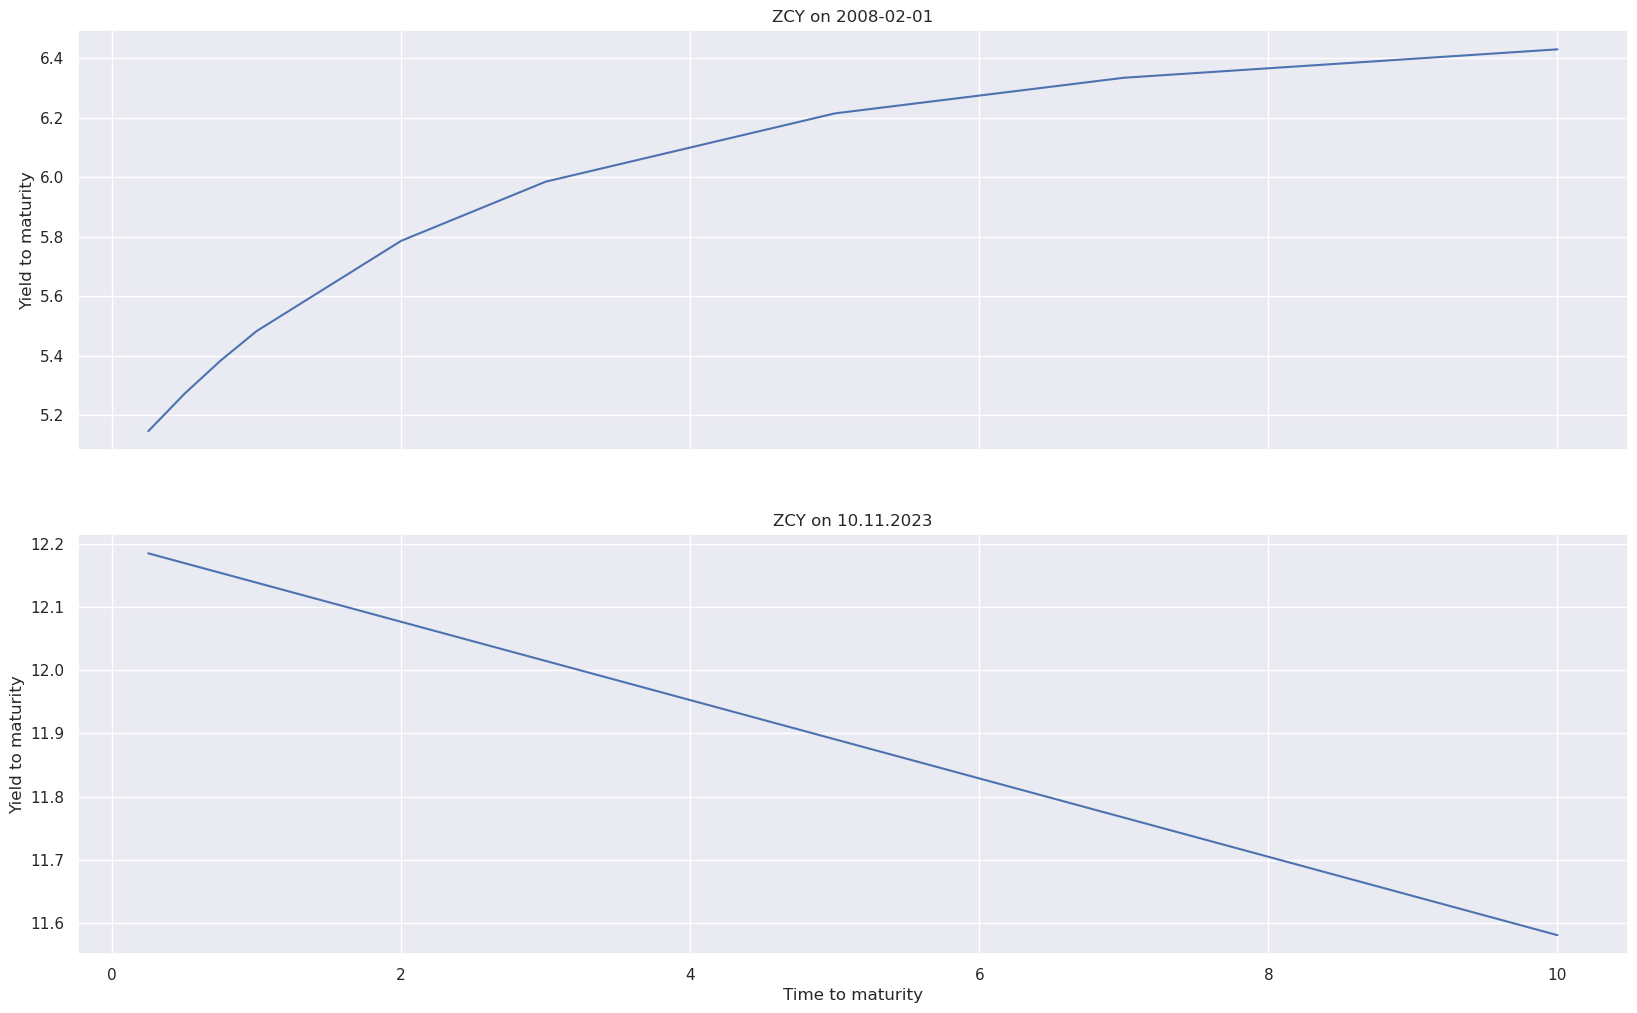

In [29]:
sns.set(rc={"figure.figsize":(20, 12)})

times = np.array([0.25, 0.5, 0.75, 1.0, 2.0, 3.0, 5.0, 7.0, 10.0])

i1 = 1
i2 = 12

fig, axs = plt.subplots(2,1, sharex=True)

p1=plotZCY(coefs["beta0"][i1], coefs["beta1"][i1], coefs["beta2"][i1], coefs["tau"][i1])
axs[0].plot(times, p1(times), label="ZCY in 2008-02-01")
axs[0].set_ylabel("Yield to maturity")
axs[0].set_title("ZCY on 2008-02-01")

p1=plotZCY(3.367e+04, -3.245e+04,  3.324e+04, -5.311e+03)
axs[1].plot(times, p1(times), label="ZCY in 10.11.2023")
axs[1].set_ylabel("Yield to maturity")
axs[1].set_title("ZCY on 10.11.2023")

plt.xlabel("Time to maturity")
plt.savefig("ZCYp.pdf")
plt.show()